# 연령별취업자수관계
- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자 데이터 다운로드</mark> <br>
- 전처리하기<br>
<hr>
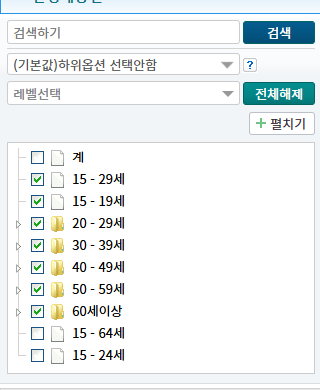<br>
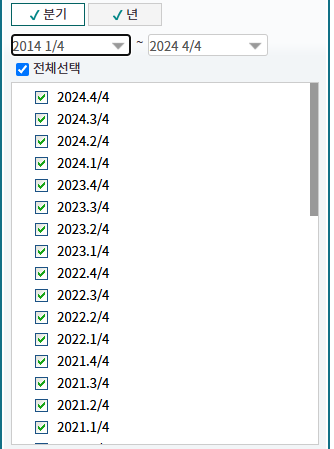<br>
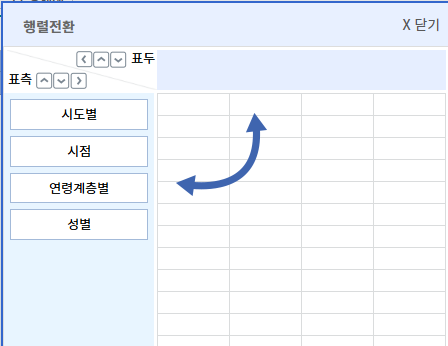


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

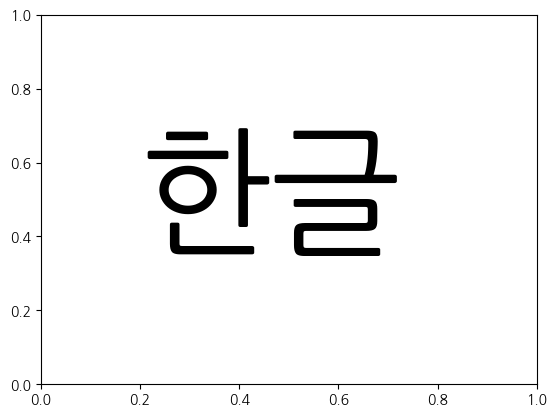

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path="./ref/행정구역시도성연령별취업자_20250304.csv"
ori= pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
# ex_data = ori.copy()
# ex_data.columns =['resion','year','age','gender','value']
# ex_data[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
# ex_data

In [5]:
ex_data = ori.copy()
ex_data.columns =['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0)
ex_data
# ex_data.groupby('year')['value'].asytype(int).sum()

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [6]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data=ex_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295
5,2015.2/4,26114
6,2015.3/4,26214
7,2015.4/4,26148
8,2016.1/4,25502
9,2016.2/4,26320


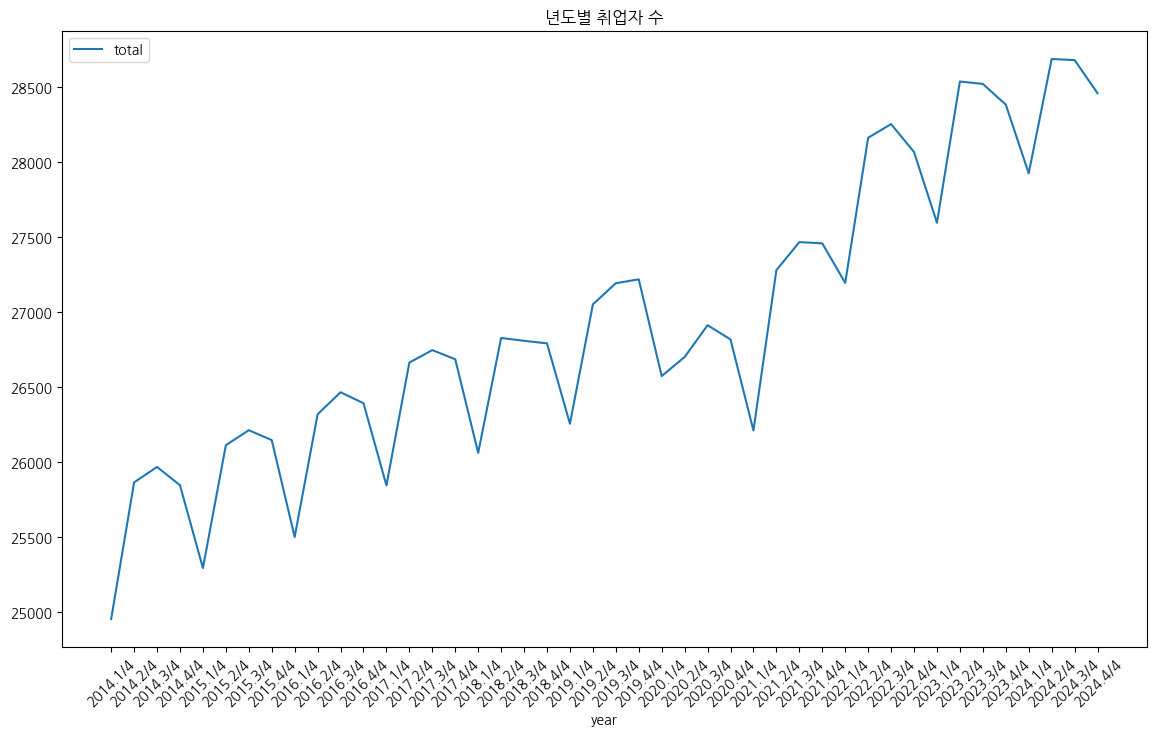

In [7]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [8]:
# ex2_data=ex_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
# ex2_data

In [9]:
# import matplotlib.pyplot as plt

# # 남자 데이터 필터링
# male_data = ex2_data[ex2_data['gender'] == '남자']

# # 여자 데이터 필터링
# female_data = ex2_data[ex2_data['gender'] == '여자']

# # 남자 차트 그리기
# ax_male = male_data.plot(x='year', y='total', figsize=(14, 8), title="년도별 취업자 수 (남자)", label='남자')
# ax_male.set_xticks(range(len(male_data)))
# ax_male.set_xticklabels(male_data['year'], rotation=45)
# plt.show()

# # 여자 차트 그리기
# ax_female = female_data.plot(x='year', y='total', figsize=(14, 8), title="년도별 취업자 수 (여자)", label='여자', color='orange')
# ax_female.set_xticks(range(len(female_data)))
# ax_female.set_xticklabels(female_data['year'], rotation=45)
# plt.show()


In [10]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시', 'value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [11]:
ex2_data['value']=ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [12]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female=gen[filter_f]


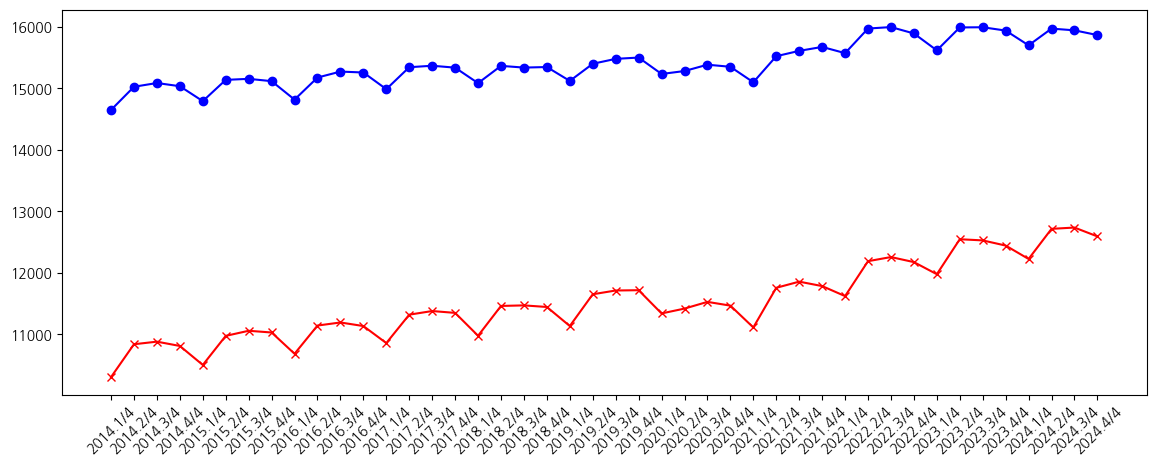

In [13]:
plt.figure(figsize=(14,5))
plt.plot(male['year'],male['total'],label='남자',color='blue',linestyle='-',marker='o')
plt.plot(female['year'],female['total'],label='여자',color='red',linestyle='-',marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

# 연령별취업자수관계리포트
- 2014년 부터 2024년 까지의 자료를 바탕으로 분석 하였다.
- 해가 지날 때 마다 계속 취업율은 올라가고 있다.
- 남성과 여성의 취업율이 비슷한 양상을 띄고 있다.

In [54]:
ex3_data = ori.copy()
ex3_data
############################
ex4_data = ori.copy()
ex4_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [55]:
ex3_data['데이터']=ex3_data['데이터'].replace('-',0) # '-' 값을 0으로 변경
ex3_data['데이터']=ex3_data['데이터'].fillna(0).astype(int) # 빈값을 0 으로 만들고, ['데이터'] 값을 int로 변경
ex3_data['데이터']
####################################################################################
ex4_data['데이터']=ex4_data['데이터'].replace('-',0) # '-' 값을 0으로 변경
ex4_data['데이터']=ex4_data['데이터'].fillna(0).astype(int) # 빈값을 0 으로 만들고, ['데이터'] 값을 int로 변경
ex4_data['데이터']

0       331
1       460
2       774
3       519
4       773
       ... 
7435     44
7436     54
7437     47
7438     49
7439     49
Name: 데이터, Length: 7440, dtype: int64

In [56]:
filter0 = (ex3_data['시점']>="2018.1/4") & (ex3_data['시점']<"2019.1/4")
ex3_data=ex3_data[filter0]
ex3_data.head()
####################################################################################
filter00 = ex4_data['시점']>="2024.1/4" # & (ex4_data['시점']<"2019.1/4")
ex4_data=ex4_data[filter00]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617


In [57]:
# filter1=ex3_data['연령계층별'].isin(['20 - 29세'])
# x_data=ex3_data[filter1]
# filter2=ex3_data['연령계층별'].isin(['60세이상'])
# y_data=ex3_data[filter2]
# x_data

In [58]:
# x = x_data.groupby("시도별")['데이터'].sum().reset_index(name='total')
# y = y_data.groupby("시도별")['데이터'].sum().reset_index(name='total')
# x.head()


In [59]:
x_data=ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
y_data=ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
x = x_data.groupby("시도별")['데이터'].sum().reset_index(name='total') # 20대
y = y_data.groupby("시도별")['데이터'].sum().reset_index(name='total') # 60대이상
z = ex3_data.groupby('시도별')['데이터'].sum().reset_index(name='total') # 전체 취업자 수

####################################################################################
# reset_index()를 하면 Series 으로 된다.
xx_data=ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
yy_data=ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
xx = xx_data.groupby("시도별")['데이터'].sum()#.reset_index(name='total') # 20대
yy = yy_data.groupby("시도별")['데이터'].sum()#.reset_index(name='total') # 60대이상
zz = ex4_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 전체 취업자 수



# reset_index()를 하면 DataFrame으로 된다.

# x = x_data.groupby("시도별")['데이터'].sum() 
# y = y_data.groupby("시도별")['데이터'].sum()
# z = ex3_data.groupby("시도별")['데이터'].sum()


# x['total']= x['total'].astype(str)
# y['total']= y['total'].astype(str)
# z['total']= z['total'].astype(str)

# # x, y, z의 타입 확인
# print(type(x))  # DataFrame이어야 정상
# print(type(y))
# print(type(z))

# # x, y, z의 컬럼 데이터 타입 확인
# print(x.dtypes)
# print(y.dtypes)
# print(z.dtypes)

# # x의 인덱스 확인
# print(x.index)


In [60]:
import numpy as np
resions = list(x['시도별'])
# resions
color = [np.random.rand(3,) for _ in range(len(resions))] #랜덤색상 color

####################################################################################
resions1 = list(xx.index)
# resions
color1 = [np.random.rand(3,) for _ in range(len(resions1))] #랜덤색상 color

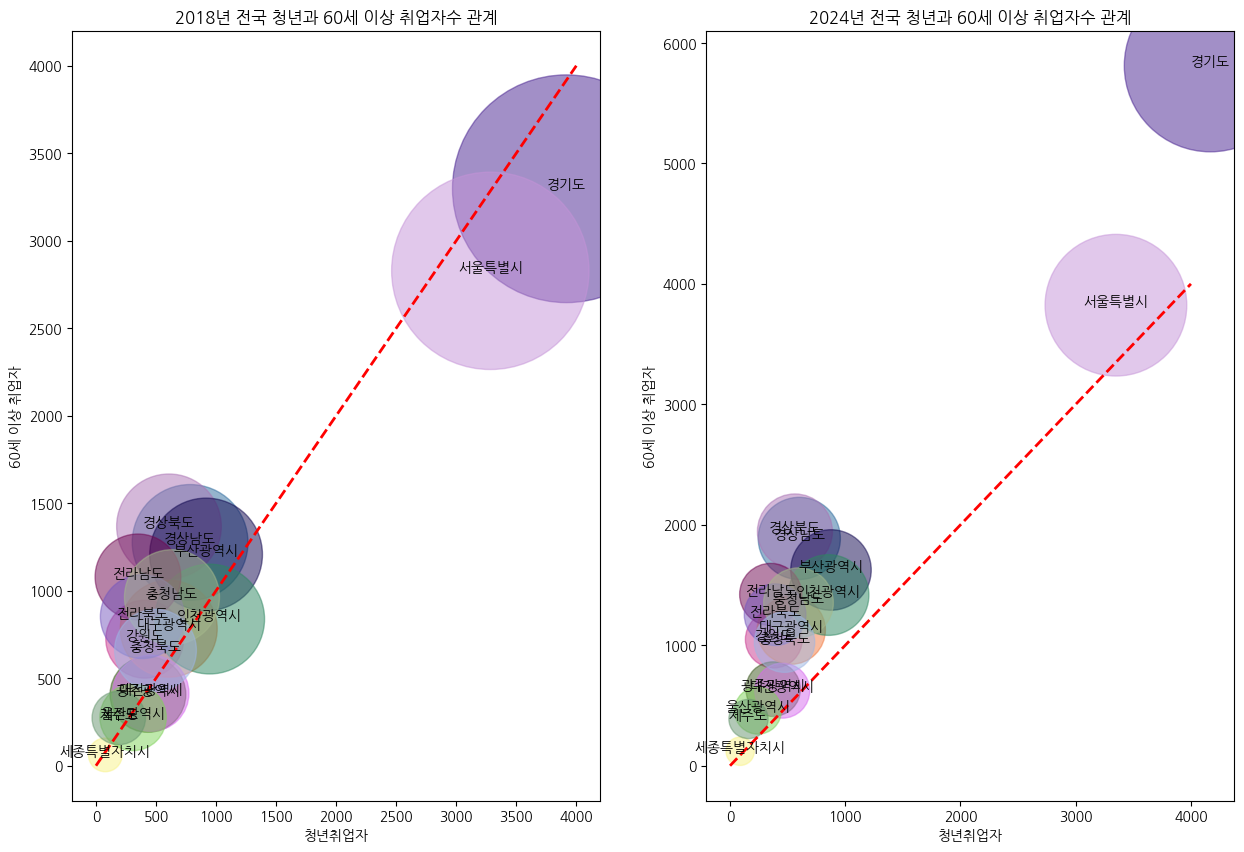

In [69]:
fig, ax = plt.subplots(1,2 ,figsize=(15,10))
scatter = ax[0].scatter(x['total'],y['total'],s=z['total'],c=color, alpha=0.5)

for n in range(len(resions)):
    ax[0].annotate(resions[n],xy=(x['total'].iloc[n],y['total'].iloc[n]),ha="center")
####################################################################################
zz = np.array(zz, dtype=float)
scatter1 = ax[1].scatter(xx,yy, s=zz*0.5, c=color, alpha=0.5)


for m in range(len(resions1)):
    ax[1].annotate(resions[m],xy=(xx.iloc[m],yy.iloc[m]),ha="center")
    
ax[0].plot([0,4000],[0,4000], color="r",  linestyle="--", linewidth=2)
ax[0].set_title('2018년 전국 청년과 60세 이상 취업자수 관계')
ax[0].set_xlabel("청년취업자")
ax[0].set_ylabel("60세 이상 취업자")
####################################################################################
ax[1].plot([0,4000],[0,4000], color="r",  linestyle="--", linewidth=2)
ax[1].set_title('2024년 전국 청년과 60세 이상 취업자수 관계')
ax[1].set_xlabel("청년취업자")
ax[1].set_ylabel("60세 이상 취업자")

plt.show()

In [124]:
from prophet import Prophet
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex5_data=ori.copy()
ex5_data['데이터']=ex5_data['데이터'].replace('-',0) # '-' 값을 0으로 변경
ex5_data['데이터']=ex5_data['데이터'].fillna(0).astype(int) # 빈값을 0 으로 만들고, ['데이터'] 값을 int로 변경
ex5_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [125]:
ex5_data['시점']=ex5_data['시점'].astype(str).str[:4]
ex5_data['시점']
ex5_data=ex5_data.groupby('시점')['데이터'].sum().reset_index(name='total')
ex5_data

,시점,total
0,2014,102637
1,2015,103771
2,2016,104683
3,2017,105946
4,2018,106495
5,2019,107724
6,2020,107010
7,2021,108421
8,2022,111684
9,2023,113044


In [126]:
ex5_data['시점'] = pd.to_datetime(ex5_data['시점'],format="%Y")
ex5_data = ex5_data.rename(columns={'시점':'ds','total':'y'})
ex5_data.tail()

,ds,y
6,2020-01-01,107010
7,2021-01-01,108421
8,2022-01-01,111684
9,2023-01-01,113044
10,2024-01-01,113759


In [127]:
m = Prophet()
m.fit(ex5_data)

13:17:11 - cmdstanpy - INFO - Chain [1] start processing
13:17:11 - cmdstanpy - INFO - Chain [1] done processing


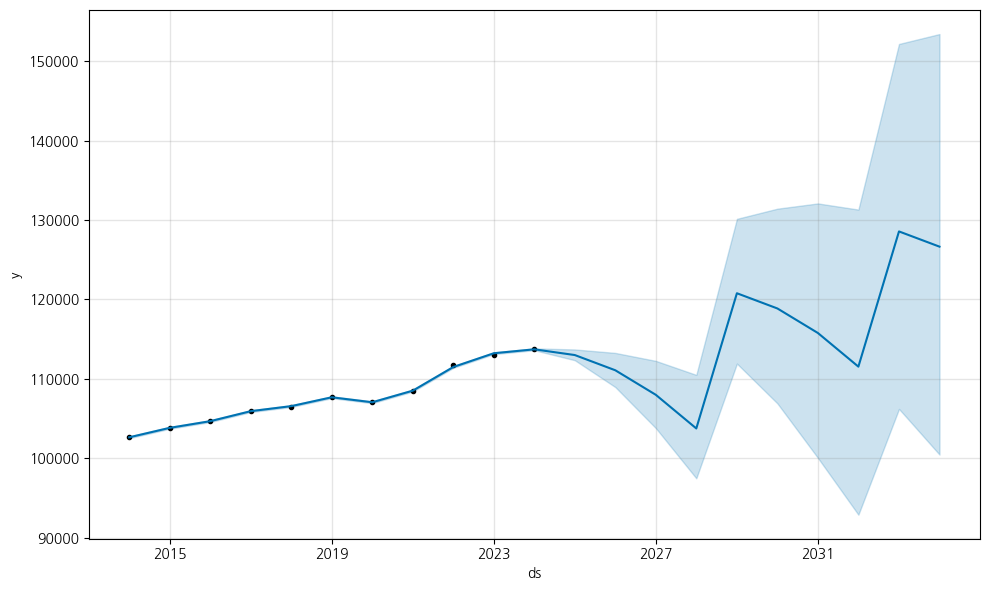

<Figure size 1000x1500 with 0 Axes>

In [128]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/미래취업율예측.png")
plt.figure(figsize=(10,15))
plt.show()